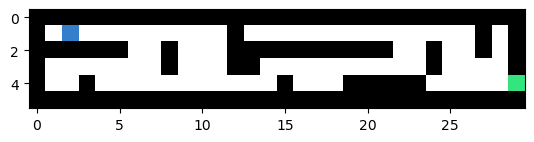

Coordenadas inicial: (2, 1)
Coordenadas meta:(29, 4)


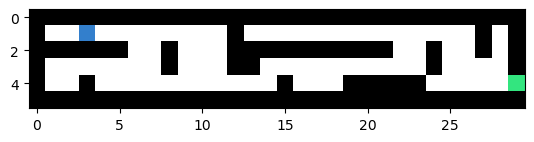

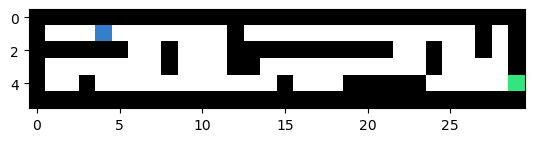

In [1]:
%run /home/kinlo/Documents/Proyecto/Recursos_dig/IA_aprendizaje/Maze.ipynb

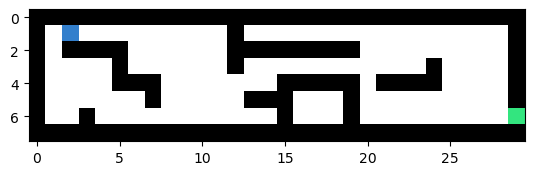

In [2]:
mapa = """
##############################
# o         #                #
# ####      ########         #
#    #      #           #    #
#    ###       ##### ####    #
#      #     ###   #         #
#  #           #   #         x
##############################
"""
ent = Maze(mapa)
ent.draw()

In [3]:
from __future__ import annotations
class FIFOQueue(object):
    def __init__(self) -> None:
        self.queue = []

    def __str__(self):
        return ' '.join([str(q) for q in self.queue])
    
    def isEmpty(self):
        """Revisa si la pila es vacia"""
        return self.queue == []
    
    def push(self, element):
        """Introduce un elemento a la pila"""
        self.queue.append(element)

    def pop(self):
        """Saca el primer elemento de la pila"""
        first_element = self.queue[0]
        del self.queue[0]
        return first_element

    def top(self):
        """Muestra el elemento en el top de la pila"""
        return self.queue[0]

In [4]:
class Node(object):
    def __init__(self) -> None:
        self.state = (0 ,0)
        self.parent = None
        self.action = None
        self.cost = 0

    def __str__(self) -> str:
        if self.parent == None:
            return f'State: {self.state}, Cost: {self.cost}'
        else:
            return (f'State: {self.state}, Action: {self.action} ' + 
                    f'Parent: {self.parent}, Cost: {self.cost}')
        
def expand(problem: Maze, node: Node):
    """Función para expandir los nodos dado el problema"""
    #Nodo inicial 
    s = node.state

    for action in problem.actions(s):
        #Ejecuta la acción 
        new_s = problem.result(s, action)

        #Genera un nuevo nodo
        new_node, new_node.state, new_node.parent, new_node.action = Node(), new_s, node, action

        yield new_node


In [5]:
def BreadthFirstSearch(problem):
    """Algoritmo Breadth-First Search"""
    #Almacenamiento de nodos
    nodes = []
    #Nodo inicial
    node = Node()
    node.state = problem.initial
    
    #Revisa si el nodo es meta
    if node in problem.goal:
        return nodes
    
    #Frontera con cola de prioridad
    frontier = FIFOQueue()
    frontier.push(node)
    #Nodos alcanzados
    reached = {problem.initial:node}

    #Mientras la frontera no esté vacía
    while frontier.isEmpty() == False:
        #Pop en frontera
        node = frontier.pop()
        #Guarda el nodo en la lista
        nodes.append(node)
        
        #Expande el nodo actual
        for child in expand(problem, node):
            #Guarda el estado del hijo
            state = child.state
            
            #Revisa si el nodo es meta
            if problem.is_goal(state):
                nodes.append(child)
                return nodes
            
            #Guarda los hijos no alcanzados o que tengan menor costo
            if state not in reached.keys():
                reached[state] = child
                frontier.push(child)
        
    #Si no logra llegar a un nodo final
    #El algoritmo regresa mensaje de error
    return "No se ha logrado llegar a un estado final."


    

In [6]:
#Aplica el algoritmo al problema
tree = BreadthFirstSearch(ent)

State: (28, 6), Action: right Parent: State: (27, 6), Action: right Parent: State: (26, 6), Action: right Parent: State: (25, 6), Action: right Parent: State: (24, 6), Action: right Parent: State: (23, 6), Action: right Parent: State: (22, 6), Action: right Parent: State: (21, 6), Action: right Parent: State: (20, 6), Action: down Parent: State: (20, 5), Action: down Parent: State: (20, 4), Action: down Parent: State: (20, 3), Action: right Parent: State: (19, 3), Action: right Parent: State: (18, 3), Action: right Parent: State: (17, 3), Action: right Parent: State: (16, 3), Action: right Parent: State: (15, 3), Action: right Parent: State: (14, 3), Action: right Parent: State: (13, 3), Action: up Parent: State: (13, 4), Action: right Parent: State: (12, 4), Action: right Parent: State: (11, 4), Action: right Parent: State: (10, 4), Action: right Parent: State: (9, 4), Action: right Parent: State: (8, 4), Action: down Parent: State: (8, 3), Action: right Parent: State: (7, 3), Action:

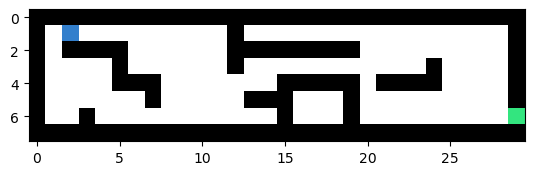

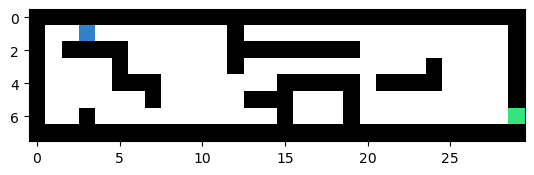

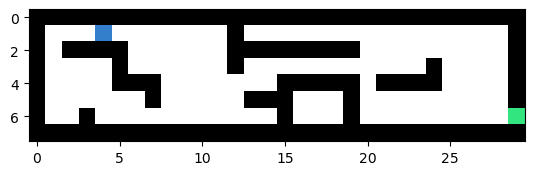

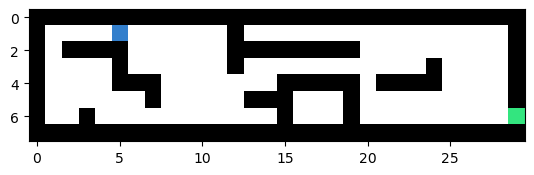

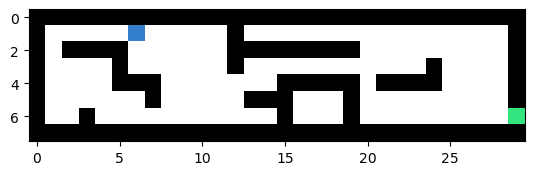

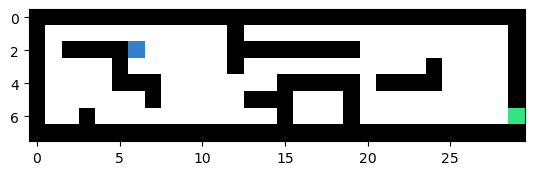

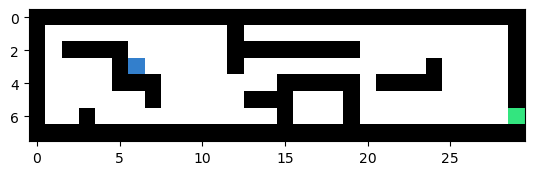

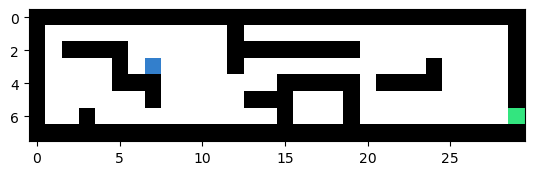

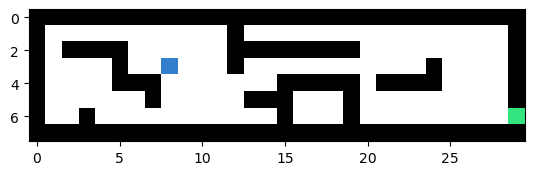

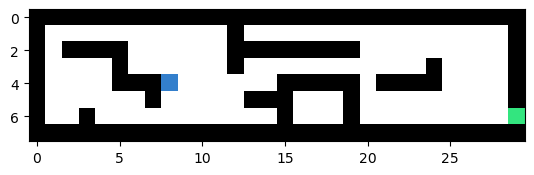

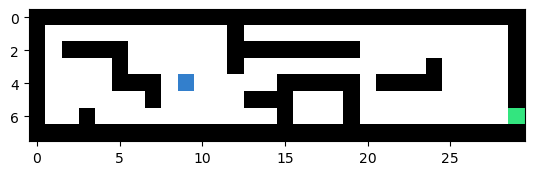

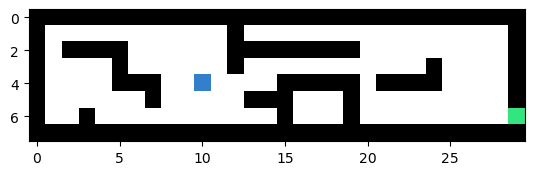

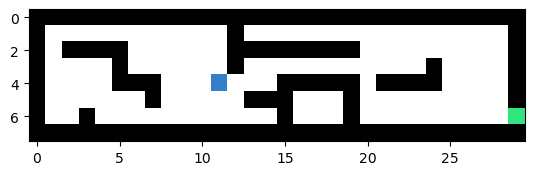

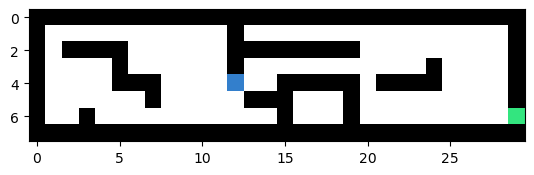

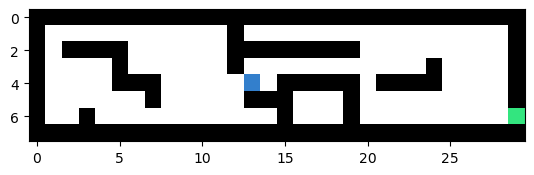

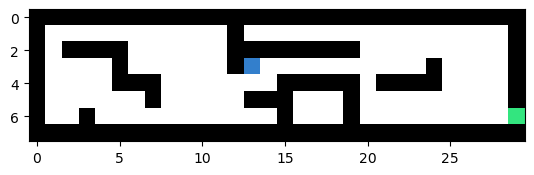

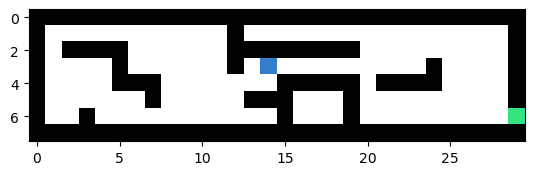

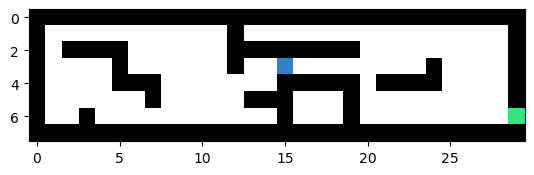

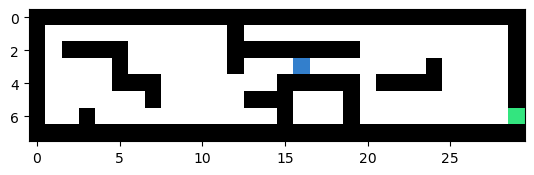

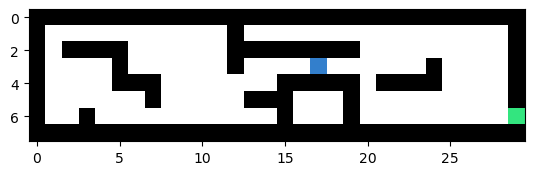

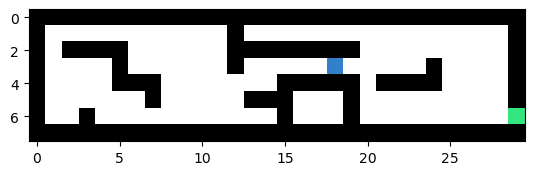

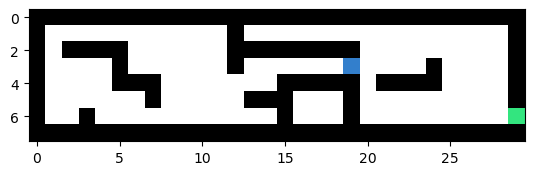

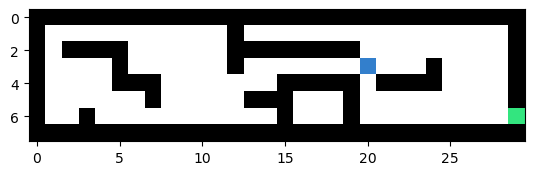

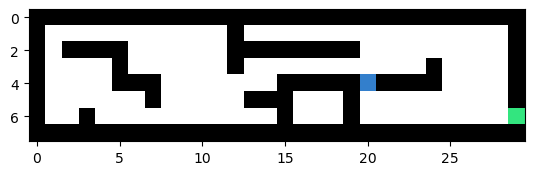

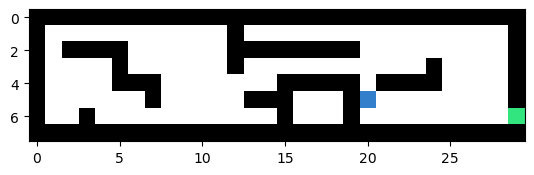

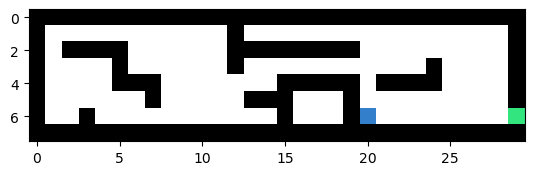

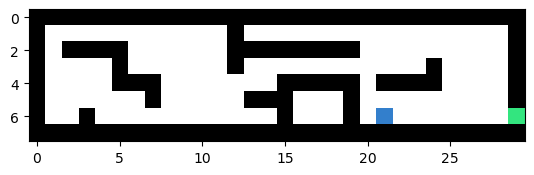

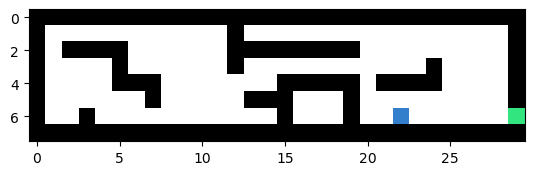

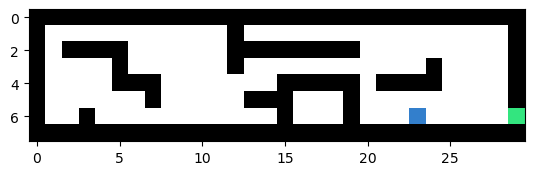

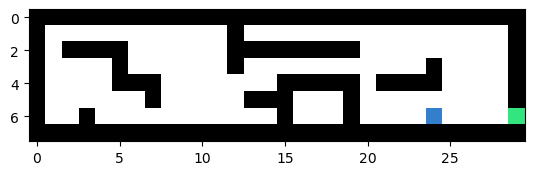

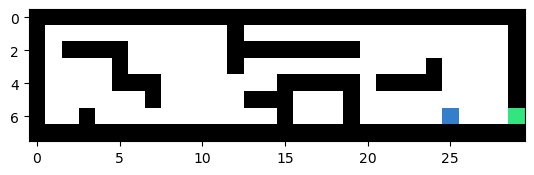

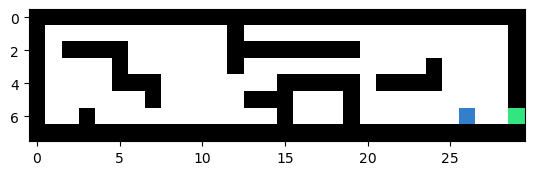

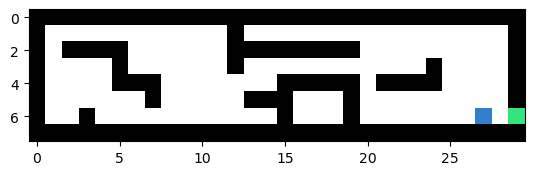

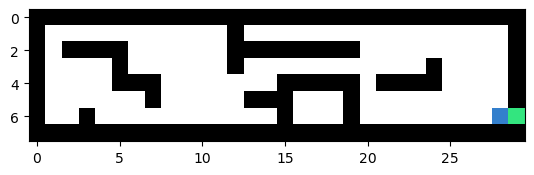

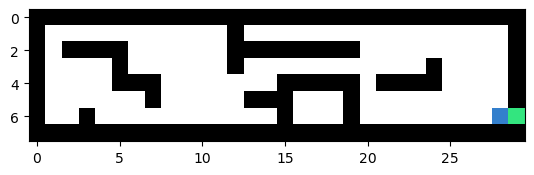

In [7]:
for n in tree[::-1]:
    print(n.parent)
def get_path(search_tree, root):
    """Recorre el árbol de búsqueda de atrás hacia el inicio para obtener el camino
    de acciones que llevaron a la meta"""
    #Meta 
    leaf = search_tree[::-1][0]
    #Padre de la meta
    parent = leaf.parent
    #Adjunta la meta y su padre al camino 
    path = [leaf, parent]
    #Recorre el árbol de búsqueda hasta el inicial 
    while parent.state != root:
        parent = parent.parent
        #Adjunta los padres en el camino 
        path.append(parent)

    return path[::-1]

#Visualiza la solucion 
prev_s = ent.initial
for n in get_path(tree, ent.initial):
    ent.move(prev_s, n.state)
    prev_s = n.state
    ent.draw()

